In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
#양측검정
N = 100
mu = 0.35
np.random.seed(0)
x = stats.bernoulli(mu).rvs(N)
print("x: ", x)

n = np.count_nonzero(x) # 0이아닌 건수
print("n: ", n)
print("binom_test(양측검정): ", stats.binom_test(n, N, p=0.5))
#p-value = 0.000183 < 0.5 -> 대립 채택

x:  [0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0]
n:  31
binom_test(양측검정):  0.00018314322488235352


In [3]:
#양측 검정 : 방향성이 없다. 80% 만족률 검증 실시
#귀무가설: 임의 교육 수료 후, 80% 정도의 만족률을 보인다.
#대립가설: 임의 교육 수료 후, 80% 정도의 만족률을 보이지 않는다.

print("---"*20)
print("양측 검정: 방향성이 없다. 80% 만족률 검증 실시")

data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/one_sample.csv")
print("\ndata: ", data.head(3))
print("\ndata.describe(): ", data.describe())

ctab = pd.crosstab(index=data["survey"], columns="count")
ctab.index = ["불만족", "만족"]
print("\n ctab: ",ctab) # 불만족 14, 만족 136

result = stats.binom_test([136, 14], p=0.8, alternative="two-sided")
result2 = stats.binom_test([14, 136], p=0.2, alternative="two-sided")
# alternative -> 방향성 명시
# alternative= : {'two-sided','greater','less'} 선택 사항 :기본은 two-sided

print("\n result:",result) # p-value = 0.000673 < 0.05 (대립 채택)
print("result2:",result2)
# 기존 만족율 80% 라는 결과와는 차이가 있다.
# 검정 결과에서 '크다, 작다' 등의 방향성은 제시하지 않는다.
# 옵션을 반대로 입력해주어도 같은 결과를 보인다.

------------------------------------------------------------
양측 검정: 방향성이 없다. 80% 만족률 검증 실시

data:     no    gender  survey time
0   1         2       1  5.1
1   2         2       0  5.2
2   3         2       1  4.7

data.describe():                 no      gender      survey
count  150.000000  150.000000  150.000000
mean    75.500000    1.526667    0.906667
std     43.445368    0.500961    0.291874
min      1.000000    1.000000    0.000000
25%     38.250000    1.000000    1.000000
50%     75.500000    2.000000    1.000000
75%    112.750000    2.000000    1.000000
max    150.000000    2.000000    1.000000

 ctab:  col_0  count
불만족       14
만족       136

 result: 0.0006734701362867019
result2: 0.000673470136286707


In [4]:
#만족률이 더 클것이라고 가정한 경우
result3 = stats.binom_test([136, 14], p=0.8, alternative="greater")
print("result3:",result3)
#p-value=0.000317 < 0.05 -> 대립 채택

result3: 0.0003179401921985477


In [5]:
#만족률이 더 것이라고 가정한 경우
result4 = stats.binom_test([14, 136], p=0.2, alternative="less")
print("result4:",result4)
#p-value=0.000317 < 0.05 -> 대립 채택

result4: 0.0003179401921985477


   친밀도  적절성  만족도
0    3    4    3
1    3    3    2
2    4    4    4
              친밀도         적절성         만족도
count  264.000000  264.000000  264.000000
mean     2.928030    3.132576    3.094697
std      0.970345    0.859657    0.828744
min      1.000000    1.000000    1.000000
25%      2.000000    3.000000    3.000000
50%      3.000000    3.000000    3.000000
75%      4.000000    4.000000    4.000000
max      5.000000    5.000000    5.000000

0.9685051269352726
0.858027707764203
0.8271724742228972

공분산
[[0.94156873 0.41642182]
 [0.41642182 0.73901083]]
[[0.94156873 0.37566252]
 [0.37566252 0.68681588]]

          친밀도       적절성       만족도
친밀도  0.941569  0.416422  0.375663
적절성  0.416422  0.739011  0.546333
만족도  0.375663  0.546333  0.686816

상관계수
[[1.         0.49920861]
 [0.49920861 1.        ]]

          친밀도       적절성       만족도
친밀도  1.000000  0.499209  0.467145
적절성  0.499209  1.000000  0.766853
만족도  0.467145  0.766853  1.000000


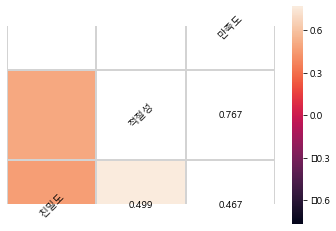

In [7]:
# 상관분석 : 두 변수 간에 어떤 선형적 관계가 있는지 분석. 밀도를 수치화
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('font', family='malgun gothic')

data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/drinking_water.csv")
print(data.head(3))
print(data.describe())

print('\n공분산')
print(np.cov(data.친밀도, data.적절성))
print(np.cov(data.친밀도, data.만족도))
print()
print(data.cov())
print("\n상관계수")
print(np.corrcoef(data.친밀도, data.적절성))
print()
print(data.corr(method='pearson')) # 등간, 비율척도일때 주로 사용
# print(data.corr(method='spearman')) # 서열척도일때 주로 사용
# print(data.corr(method='kendall')) 

# sns.heatmap(data.corr())
# plt.show()

# hitmap에 텍스트 표시 추가사항 적용해 보기
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)  # 상관계수값 표시
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
fig, ax = plt.subplots()     # Set up the matplotlib figure

sns.heatmap(corr, mask=mask, vmin=-vmax, vmax=vmax,
square=True, linecolor="lightgray", linewidths=1, ax=ax)

for i in range(len(corr)):
    ax.text(i + 0.5, len(corr) - (i + 0.5), corr.columns[i],
ha="center", va="center", rotation=45)
    for j in range(i + 1, len(corr)):
        s = "{:.3f}".format(corr.values[i, j])
        ax.text(j + 0.5, len(corr) - (i + 0.5), s, ha="center", va="center")
ax.axis("off")
plt.show()